In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import exploring_script as es
import importlib
importlib.reload(es)
import matplotlib.pyplot as plt

In [3]:
confirmed_sso = es.load_data(["ssnamenr"])

In [4]:
len(confirmed_sso["ssnamenr"].unique())

517611

In [5]:
mpc_ast_data = pd.read_parquet(
    "../data/MPC_Database/mpcorb_extended.parquet",
    columns=["Number", "Name", "Principal_desig", "Other_desigs", "a", "e", "i", "Node", "Peri", "M", "Epoch", "Orbit_type"]
)

mpc_comet_data = pd.read_parquet("../data/MPC_Database/cometels.parquet")

In [39]:
mpc_in_fink, fink_not_in_mpc, mpc_not_in_fink = es.cross_match_fink_mpc(confirmed_sso, mpc_ast_data)

436566
0
71501
429


In [17]:
len(mpc_ast_data), len(mpc_in_fink) + len(mpc_not_in_fink.drop_duplicates("Number"))

(1263651, 680415)

In [140]:
t1 = mpc_ast_data["Number"].str[1:-1].isin(confirmed_sso["ssnamenr"].unique())
t2 = mpc_ast_data["Principal_desig"].str.replace(" ", "").isin(confirmed_sso["ssnamenr"].unique())
c = mpc_ast_data[t1 | t2]
d = mpc_ast_data[~t1 & ~t2]

In [141]:
len(c), len(d), len(c) + len(d), len(mpc_ast_data)

(504129, 759522, 1263651, 1263651)

In [142]:
a11 = pd.concat([c, d]).reset_index(drop=True)

In [200]:
mpc_explode = mpc_ast_data.explode("Other_desigs")
mpc_explode = mpc_explode[~(mpc_explode["Principal_desig"] == mpc_explode["Other_desigs"])]
t1 = mpc_explode["Number"].str[1:-1].isin(confirmed_sso["ssnamenr"].unique())
t2 = mpc_explode["Principal_desig"].str.replace(" ", "").isin(confirmed_sso["ssnamenr"].unique())
t3 = mpc_explode["Name"].str.replace(" ", "").isin(confirmed_sso["ssnamenr"].unique())
t4 = mpc_explode["Other_desigs"].str.replace(" ", "").isin(confirmed_sso["ssnamenr"].unique())
c = mpc_explode[t1 | t2 | t3 | t4]
d = mpc_explode[~(t1 | t2 | t3 | t4)]

In [195]:
len(mpc_explode[t1 | t2 | t3]), len(mpc_explode[t4]), len(mpc_explode[t1 | t2 | t3]) + len(mpc_explode[t4])

(576022, 430, 576452)

In [196]:
len(mpc_explode[t1 | t2 | t3].drop_duplicates("Principal_desig")) + len(mpc_explode[t4].drop_duplicates("Principal_desig"))

504559

In [197]:
1263651 - 504557

759094

In [198]:
len(mpc_explode[~(t1 | t2 | t3)].drop_duplicates("Principal_desig")) - len(mpc_explode[t4].drop_duplicates("Principal_desig"))

759092

In [199]:
504557 + 759950

1264507

In [172]:
len(c.drop_duplicates("Principal_desig")), len(d.drop_duplicates("Principal_desig"))

(504455, 759228)

In [173]:
len(c.drop_duplicates("Principal_desig")) + len(d.drop_duplicates("Principal_desig")), len(mpc_ast_data)

(1263683, 1263651)

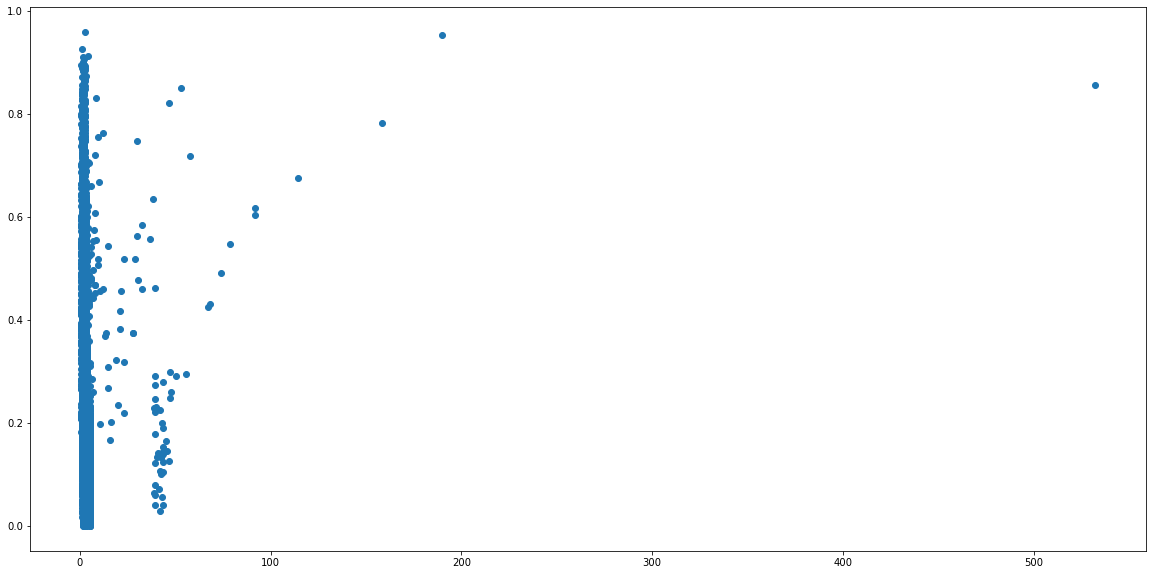

In [61]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(mpc_in_fink["a"], mpc_in_fink["e"])

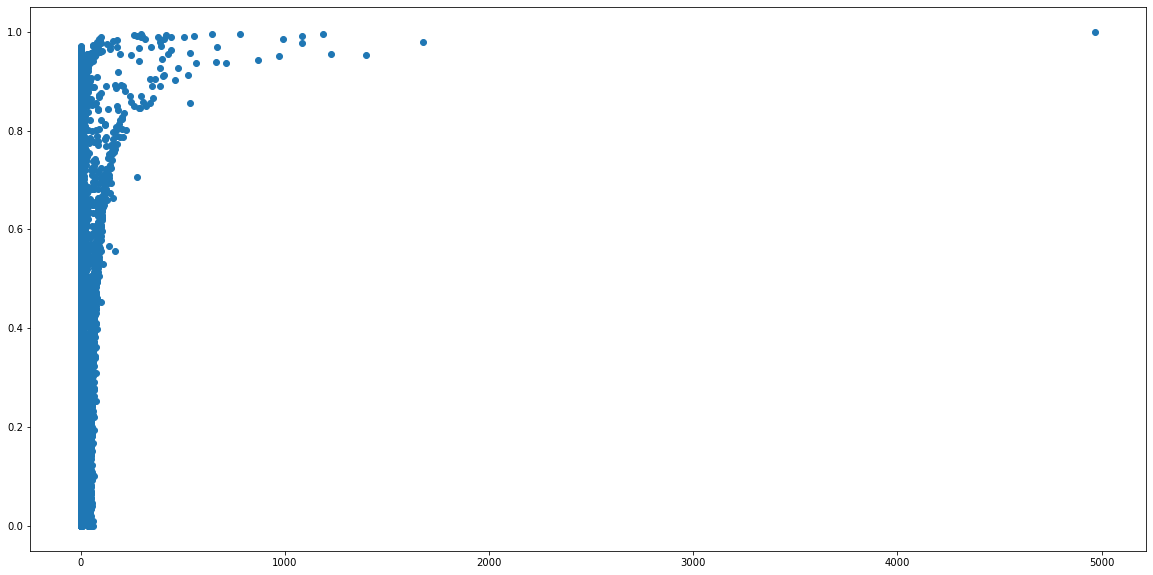

In [62]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(mpc_ast_data["a"], mpc_ast_data["e"])